In [3]:
import pickle
file_path='models/car_svm.pkl'

f=open(file_path, 'rb')
svm = pickle.load(f)

/home/james/virt3/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


detection location
detection location
detection location
detection location
detection location
detection location
detection location
detection location
detection location
detection location
detection location


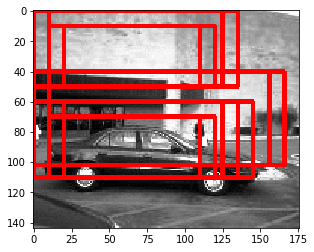

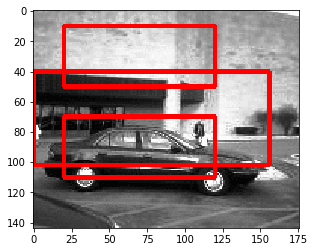

In [6]:
from skimage.transform import pyramid_gaussian
from skimage.io import imread
from skimage.feature import hog
from sklearn.externals import joblib 
import cv2
import matplotlib.pyplot as plt
from mns import nms,sliding_window
%matplotlib inline


#path="data/CarData/TestImages_Scale/test-52.pgm"
#path="data/Car/Test/TestImages/test-2.pgm"
path="data/Car/Test/TestImages_Scale/test-0.pgm"

im1=cv2.imread(path)
im = imread(path, as_grey=False)
scale = 0
downscale=1.25
min_wdw_sz = (100, 40)
step_size = (10, 10)

detections = []
for im_scaled in pyramid_gaussian(im, downscale=downscale):
    cd = []
    if im_scaled.shape[0] < min_wdw_sz[1] or im_scaled.shape[1] < min_wdw_sz[0]:
        break
    for (x, y, im_window) in sliding_window(im_scaled, min_wdw_sz, step_size):
        if im_window.shape[0] != min_wdw_sz[1] or im_window.shape[1] != min_wdw_sz[0]:
            continue
   
        fd=hog(im_window, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualise=False)
        fd = fd.reshape(1,-1)
        pred = svm.predict(fd)
        if pred == 1:
            print("detection location")
            detections.append((x, y, svm.decision_function(fd),
                int(min_wdw_sz[0]*(downscale**scale)),
                int(min_wdw_sz[1]*(downscale**scale))))
            cd.append(detections[-1])        
    scale+=1

clone = im1.copy()
for (x_tl, y_tl, _, w, h) in detections:
    cv2.rectangle(im1, (x_tl, y_tl), (x_tl+w, y_tl+h), (0, 0, 255), thickness=2)

plt.imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))

plt.show()

threshold=.3
detections = nms(detections, threshold)
for (x_tl, y_tl, _, w, h) in detections:
    cv2.rectangle(clone, (x_tl, y_tl), (x_tl+w,y_tl+h), (0, 0, 255), thickness=2)
plt.imshow(cv2.cvtColor(clone, cv2.COLOR_BGR2RGB))


plt.show()